# Vectorized String Operations
One strength of Python is its relative ease in handling and manipulating string data. Pandas builds on this and provides a comprehensive set of vectorized string operations that become an essential piece of the type of munging required when working with (read: cleaning up) real-world data. In this section, we'll walk through some of the Pandas string operations, and then take a look at using them to partially clean up a very messy dataset of recipes collected from the Internet.

# Introducing Pandas String Operations
We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:

In [1]:
import numpy as np
x = np.array([2, 3, 5, 7, 1, 13])
x * 2

array([ 4,  6, 10, 14,  2, 26])

In [2]:
data = ['john', 'mary', 'paul', 'william']

In [3]:
[s.capitalize() for s in data]

['John', 'Mary', 'Paul', 'William']

In [4]:
data = ['john', 'mary', None, 'paul', 'william']

In [5]:
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [6]:
import pandas as pd
names = pd.Series(data)
print(names)

0       john
1       mary
2       None
3       paul
4    william
dtype: object


In [7]:
names.str.capitalize()

0       John
1       Mary
2       None
3       Paul
4    William
dtype: object

# Tables of Pandas String Methods
If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties. The examples in this section use the following series of names:

In [8]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

# Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:
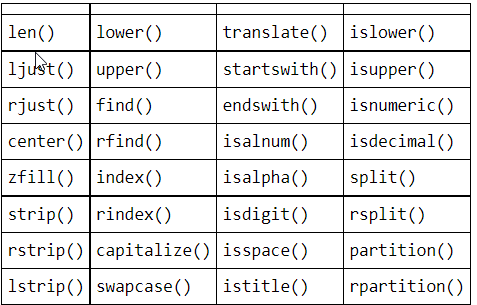

Notice that these have various return values. Some, like lower(), return a series of strings:


In [9]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [10]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [11]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [12]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [13]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [14]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

# Vectorized item access and slicing
The get() and slice() operations, in particular, enable vectorized element access from each array. For example, we can get a slice of the first three characters of each array using str.slice(0, 3). Note that this behavior is also available through Python's normal indexing syntax–for example, df.str.slice(0, 3) is equivalent to df.str[0:3]:

In [15]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [16]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

# Indicator variables
Another method that requires a bit of extra explanation is the get_dummies() method. This is useful when your data has a column containing some sort of coded indicator. For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [17]:

full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [18]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Example: Recipe Database
These vectorized string operations become most useful in the process of cleaning up messy, real-world data. Here I'll walk through an example of that, using an open recipe database compiled from various sources on the Web. Our goal will be to parse the recipe data into ingredient lists, so we can quickly find a recipe based on some ingredients we have on hand.

The scripts used to compile this can be found at https://github.com/fictivekin/openrecipes, and the link to the current version of the database is found there as well.

As of Summer 2020, this database is about no longer supported so we have placed the last available dump 20170107-061401-recipeitems.json in the data folder.

The database is in JSON format, so we will try pd.read_json to read it:

In [25]:
try:
    recipes = pd.read_json('./data/20170107-061401-recipeitems_small_sample.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Expected object or value
